GBM LCs repository: /astrodata/romain/GBM_LC_repository/data/bn*********/LC/

In [89]:
################################################################################
# Import the libraries
################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GBM GRBs fluence catalogue: see Table 6 from von Kienlin et al. (2020) 

In [90]:
################################################################################
# Load the machine readable Table 6 from von Kienlin et al. (2020)
################################################################################

fermi_ids = []
fluences = []
e_fluences = []

with open('./von_kienlin20_apj_table6.txt', 'r') as f:
    lines = f.readlines()[23:]
    for line in lines[:-1]:
        words = line.split()
        fermi_ids.append(words[0])
        fluences.append(float(words[1]))
        e_fluences.append(float(words[2]))
        


In [91]:
################################################################################
# Load the machine readable Table 6 from von Kienlin et al. (2020)
################################################################################

t90s      = []
e_t90     = []

with open('./von_kienlin20_apj_table5.txt', 'r') as f:
    lines = f.readlines()[93:]
    for line in lines[:-1]:
        words = line.split()
        try:
            t90s.append(float(words[2]))
            e_t90.append(float(words[3]))
        except ValueError:
            t90s.append(float(words[3]))
            e_t90.append(float(words[4]))

In [92]:
fluence_dict = {'fermi_ids': fermi_ids, 'fluences': fluences, 'e_fluences': e_fluences, 'T90': t90s, 'Err_T90': e_t90}

fluence_df = pd.DataFrame(fluence_dict)
fluence_df

,fermi_ids,fluences,e_fluences,T90,Err_T90
0,bn080714425,1.810000e-06,2.090000e-08,5.376,2.360
1,bn080714745,6.330000e-06,1.410000e-07,40.192,1.145
2,bn080715950,5.040000e-06,7.950000e-08,59.649,11.276
3,bn080717543,4.460000e-06,7.680000e-08,7.872,0.272
4,bn080719529,7.750000e-07,2.930000e-08,36.609,2.985
...,...,...,...,...,...
2353,bn180703876,1.630000e-05,4.290000e-08,25.601,1.619
2354,bn180703949,8.850000e-06,1.820000e-08,20.736,1.557
2355,bn180706351,3.980000e-06,2.950000e-08,1.536,0.091
2356,bn180709099,3.880000e-06,2.750000e-08,38.144,1.145


In [136]:
np.array(fluence_df['fermi_ids'], dtype='str')

array(['bn080714425', 'bn080714745', 'bn080715950', ..., 'bn180706351',
       'bn180709099', 'bn180710062'], dtype='<U11')

In [140]:
with open('vk_catalog_list.txt', 'w') as vk_list_file:
    np.savetxt(vk_list_file, np.array(fluence_df['fermi_ids'], dtype='str'), fmt="%12s")

In [112]:
################################################################################
# Select only those GRBs whose fluence is at least equal to 1e-5
################################################################################

#
bright_fluence_df = fluence_df[np.logical_and(fluence_df['fluences'] >= 1e-5, fluence_df['T90'] >= 2)]
#bright_fluence_df = fluence_df[fluence_df['fluences'] >= 1e-5]
bright_fluence_df

,fermi_ids,fluences,e_fluences,T90,Err_T90
6,bn080723557,0.000072,2.540000e-07,16.128,17.887
9,bn080724401,0.000016,5.040000e-08,42.817,0.659
22,bn080806896,0.000013,1.940000e-07,2.304,0.453
33,bn080817161,0.000053,7.310000e-08,4.608,0.453
40,bn080825593,0.000034,9.700000e-08,7.424,2.005
...,...,...,...,...,...
2337,bn180612785,0.000016,5.770000e-08,8.960,0.572
2339,bn180615462,0.000015,1.780000e-07,9.216,2.573
2342,bn180618724,0.000019,5.270000e-08,3.712,0.580
2347,bn180623849,0.000020,3.400000e-08,58.881,6.415


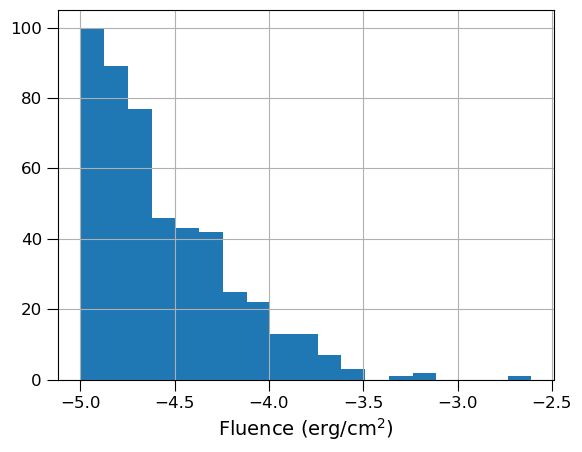

In [4]:
bright_fluences = bright_fluence_df['fluences']

################################################################################
# Plot the histogram of the fluences
################################################################################

fig, ax = plt.subplots(1, 1)
log_fluences = np.log10(bright_fluences)
log_bins = np.linspace(np.min(log_fluences), np.max(log_fluences), 20)
ax.hist(log_fluences, bins=log_bins)
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'Fluence (erg/cm$^2$)', size=14)
ax.grid(which='both')
plt.show()

In [94]:
################################################################################
# Save the list of selected Fermi IDs and fluences
################################################################################

with open('./bright_gbm_grbs.txt', 'w') as file:
    file.write('#%10s %8s %8s\n' %('fermi_id', 'fluence', 'T90'))
    for fermi_id, fluence, T90 in zip(bright_fluence_df['fermi_ids'], bright_fluence_df['fluences'], bright_fluence_df['T90']):
        file.write('%11s %3.2e %3.2e\n' %(fermi_id, fluence, T90))

In [95]:
with open('./gbm_lcs/astrodata/romain/GBM_LC_repository/data/fermi_ids.txt', 'w') as chosen_grbs:
    for fermi_id in bright_fluence_df['fermi_ids']:
        chosen_grbs.write('%11s\n' %(fermi_id))

In [131]:
################################################################################
# LC selection
################################################################################

chosen_fermi_ids = np.loadtxt('./gbm_lcs/astrodata/romain/GBM_LC_repository/data/fermi_ids.txt', dtype=str)
ids, units, starts, stops, counts = np.loadtxt('./gbm_lcs/astrodata/romain/GBM_LC_repository/data/fermi_id_time_count_list.txt', 
                                          dtype=str, unpack=True)

units = units.astype('float')
starts = starts.astype('float')
stops = stops.astype('float')
counts = counts.astype('float')
sel_ids = np.array(bright_fluence_df['fermi_ids'])
mask  = [fermi_id in sel_ids for fermi_id in ids]
counts = counts[mask]

In [125]:
chosen_df = bright_fluence_df[bright_fluence_df['fermi_ids'].isin(ids)]
chosen_df

,fermi_ids,fluences,e_fluences,T90,Err_T90
6,bn080723557,0.000072,2.540000e-07,16.128,17.887
9,bn080724401,0.000016,5.040000e-08,42.817,0.659
22,bn080806896,0.000013,1.940000e-07,2.304,0.453
33,bn080817161,0.000053,7.310000e-08,4.608,0.453
40,bn080825593,0.000034,9.700000e-08,7.424,2.005
...,...,...,...,...,...
2337,bn180612785,0.000016,5.770000e-08,8.960,0.572
2339,bn180615462,0.000015,1.780000e-07,9.216,2.573
2342,bn180618724,0.000019,5.270000e-08,3.712,0.580
2347,bn180623849,0.000020,3.400000e-08,58.881,6.415


In [126]:
chosen_fluences = chosen_df['fluences']
chosen_fluences

6       0.000072
9       0.000016
22      0.000013
33      0.000053
40      0.000034
          ...   
2337    0.000016
2339    0.000015
2342    0.000019
2347    0.000020
2353    0.000016
Name: fluences, Length: 372, dtype: float64

In [127]:
k = np.log10(chosen_fluences/counts)
k

6      -8.815059
9      -8.709810
22     -8.766167
33     -8.704632
40     -8.762321
          ...   
2337   -8.475040
2339   -8.175175
2342   -9.060399
2347   -8.564230
2353   -9.778027
Name: fluences, Length: 372, dtype: float64

In [129]:
np.savetxt("log10_fluence_over_counts_Fermi_GBM.txt", k)

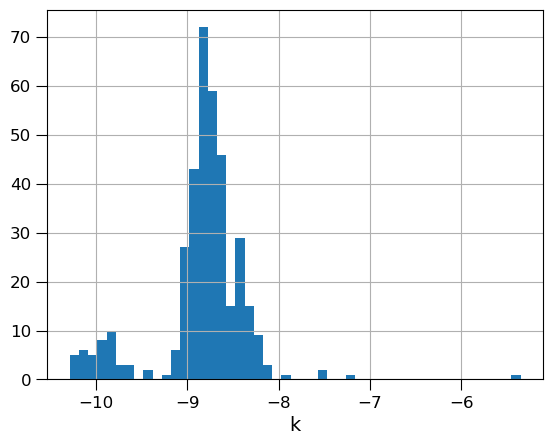

In [128]:
################################################################################
# Plot the histogram of the conversion factors
################################################################################

fig, ax = plt.subplots(1, 1)
log_bins = np.linspace(np.min(k), np.max(k), 50)
ax.hist(k, bins=log_bins)
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'k', size=14)
ax.grid(which='both')
plt.show()

In [133]:
with open('./gbm_list.txt', 'w') as outfile:
    outfile.write('#%11s %12s %12s %12s %12s %12s %12s %12s %12s\n' % ('fermi_id', 'Units', 'T_start', 'T_stop', 'Counts', 'Fluence', 'k', 'T90', 'Err_T90'))
    t90s = chosen_df['T90']
    err_t90s = chosen_df['Err_T90']
    for fermi_id, unit, start, stop, count, fluence, factor, t90, err_t90 in zip(fermi_ids, units, starts, stops, counts, chosen_fluences, k, t90s, err_t90s):
        outfile.write('%12s %12d %12.3f %12.3f %12.3f %12.2e %12.5f %12.3f %12.3f\n' % (fermi_id, unit, start, stop, count, fluence, factor, t90, err_t90))